In [1]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib qt5

In [2]:
data=pd.read_table('./data/RAW_ACCELEROMETERS.txt',sep=' ',header=None)
data = data.dropna(axis = 1)
data = data.rename(columns = {0:"Time" , 1:"system activated" , 2:"X" , 3:"Y" ,
                              4:"Z" , 5:"X by KF" , 6:"Y by KF" , 
                              7:"Z by KF" , 8:"Roll" , 9:"Pitch" , 10:"Yaw"})

data=pd.DataFrame(data,dtype=np.float)
data

,Time,system activated,X,Y,Z,X by KF,Y by KF,Z by KF,Roll,Pitch,Yaw
0,8.02,1.0,-0.013,-0.021,0.011,-0.031,-0.009,0.013,-1.627,-0.011,0.294
1,8.12,1.0,-0.008,-0.005,-0.017,-0.018,-0.011,0.002,-1.626,-0.007,0.297
2,8.22,1.0,-0.013,-0.026,-0.012,-0.005,-0.011,-0.008,-1.625,-0.003,0.299
3,8.32,1.0,-0.049,-0.018,0.033,-0.029,-0.018,0.002,-1.626,0.001,0.302
4,8.43,1.0,0.016,0.009,0.014,-0.021,-0.008,0.021,-1.627,0.004,0.304
...,...,...,...,...,...,...,...,...,...,...,...
7282,745.45,1.0,0.004,-0.009,0.019,-0.003,-0.017,0.009,-1.527,0.010,-2.639
7283,745.55,1.0,-0.013,-0.019,-0.049,0.004,-0.033,-0.005,-1.525,0.015,-2.636
7284,745.65,1.0,-0.082,-0.012,0.001,-0.043,-0.007,-0.024,-1.526,0.014,-2.637
7285,745.75,1.0,-0.041,-0.037,0.025,-0.052,-0.021,0.010,-1.528,0.014,-2.632


In [3]:
event_lanchange = pd.read_table('./data/EVENTS_LIST_LANE_CHANGES.txt',sep=' ',header=None)
event_lanchange = event_lanchange.rename(columns = {0:'Time', 1:'slow or fast', 2:'gpsLatitude', 
                                                    3:'gpslongitude', 4:'duration', 5:'threshold'})
lanchange =  event_lanchange.copy()
lanchange.pop('gpsLatitude')
lanchange.pop('gpslongitude')
newdata = data.copy()
newdata["lanchange"] = None
newdata=pd.DataFrame(newdata,dtype=np.float)
lanchange=pd.DataFrame(lanchange,dtype=np.float)
lanchange

,Time,slow or fast,duration,threshold
0,17.26,-1.0,0.73,1.5
1,35.70,-1.0,1.00,1.5
2,49.54,1.0,0.86,1.5
3,83.13,-1.0,0.21,1.5
4,111.71,1.0,0.86,1.5
5,141.37,-1.0,0.82,1.5
6,251.79,1.0,0.90,1.5
7,260.01,1.0,0.98,1.5
8,306.05,1.0,1.42,1.5
9,310.02,1.0,0.93,1.5


In [4]:
j = 0
for i in range(len(lanchange)):
    while j <= len(newdata):
        if newdata['Time'][j] > (lanchange['Time'][i] + lanchange['duration'][i]):
            break
        if newdata['Time'][j] > lanchange['Time'][i]:
            newdata['lanchange'][j] = lanchange['slow or fast'][i]
        else:
            newdata['lanchange'][j] = 0
        j += 1
while j <= len(newdata):
    newdata['lanchange'][j] = 0
    j += 1
newdata         

,Time,system activated,X,Y,Z,X by KF,Y by KF,Z by KF,Roll,Pitch,Yaw,lanchange
0,8.02,1.0,-0.013,-0.021,0.011,-0.031,-0.009,0.013,-1.627,-0.011,0.294,0.0
1,8.12,1.0,-0.008,-0.005,-0.017,-0.018,-0.011,0.002,-1.626,-0.007,0.297,0.0
2,8.22,1.0,-0.013,-0.026,-0.012,-0.005,-0.011,-0.008,-1.625,-0.003,0.299,0.0
3,8.32,1.0,-0.049,-0.018,0.033,-0.029,-0.018,0.002,-1.626,0.001,0.302,0.0
4,8.43,1.0,0.016,0.009,0.014,-0.021,-0.008,0.021,-1.627,0.004,0.304,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7282,745.45,1.0,0.004,-0.009,0.019,-0.003,-0.017,0.009,-1.527,0.010,-2.639,0.0
7283,745.55,1.0,-0.013,-0.019,-0.049,0.004,-0.033,-0.005,-1.525,0.015,-2.636,0.0
7284,745.65,1.0,-0.082,-0.012,0.001,-0.043,-0.007,-0.024,-1.526,0.014,-2.637,0.0
7285,745.75,1.0,-0.041,-0.037,0.025,-0.052,-0.021,0.010,-1.528,0.014,-2.632,0.0


In [5]:
newdata["turning"] = None
newdata["braking"] = None
newdata["acceleration"] = None

event_inertial = pd.read_table('./data/EVENTS_INERTIAL.txt',sep=' ',header=None)
event_inertial = event_inertial.rename(columns = {0:'Time', 1:'type', 2:'Level', 
                                                    3:'gpslatitude', 4:'gpslongitude', 5:'YYYYMMDD'})
event_inertial = event_inertial.dropna(axis = 1)
inertial = event_inertial.copy()
inertial.pop('gpslatitude')
inertial.pop('gpslongitude')
inertial.pop('YYYYMMDD')
newdata=pd.DataFrame(newdata,dtype=np.float)
inertial=pd.DataFrame(inertial,dtype=np.float)
inertial

,Time,type,Level
0,253.72,2.0,2.0
1,282.60,1.0,1.0
2,333.16,1.0,2.0
3,370.62,1.0,1.0
4,374.53,1.0,1.0
5,397.76,1.0,1.0
6,401.22,1.0,1.0
7,420.44,1.0,2.0
8,610.78,2.0,1.0
9,704.65,2.0,1.0


In [6]:
j = 0
for i in range(len(inertial)):
    while j <= len(newdata):  
        if newdata['Time'][j] > inertial['Time'][i]:  
            if newdata['Time'][j] > (inertial['Time'][i] + (inertial['Level'][i] * 3)):
                break
                
            if inertial['type'][i] == 1 :
                newdata['braking'][j] = inertial['Level'][i]
                newdata['turning'][j] = 0
                newdata['acceleration'][j] = 0
            elif inertial['type'][i] == 2 :
                newdata['turning'][j] = inertial['Level'][i]
                newdata['braking'][j] = 0
                newdata['acceleration'][j] = 0
            elif inertial['type'][i] == 3 :
                newdata['acceleration'][j] = inertial['Level'][i]
                newdata['braking'][j] = 0
                newdata['turning'][j] = 0
                
        else: 
            newdata['braking'][j] = 0
            newdata['turning'][j] = 0
            newdata['acceleration'][j] = 0
        
        j += 1
            
while j <= len(newdata):
    newdata['braking'][j] = 0
    newdata['turning'][j] = 0
    newdata['acceleration'][j] = 0
    
    j += 1

newdata

,Time,system activated,X,Y,Z,X by KF,Y by KF,Z by KF,Roll,Pitch,Yaw,lanchange,turning,braking,acceleration
0,8.02,1.0,-0.013,-0.021,0.011,-0.031,-0.009,0.013,-1.627,-0.011,0.294,0.0,0.0,0.0,0.0
1,8.12,1.0,-0.008,-0.005,-0.017,-0.018,-0.011,0.002,-1.626,-0.007,0.297,0.0,0.0,0.0,0.0
2,8.22,1.0,-0.013,-0.026,-0.012,-0.005,-0.011,-0.008,-1.625,-0.003,0.299,0.0,0.0,0.0,0.0
3,8.32,1.0,-0.049,-0.018,0.033,-0.029,-0.018,0.002,-1.626,0.001,0.302,0.0,0.0,0.0,0.0
4,8.43,1.0,0.016,0.009,0.014,-0.021,-0.008,0.021,-1.627,0.004,0.304,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7282,745.45,1.0,0.004,-0.009,0.019,-0.003,-0.017,0.009,-1.527,0.010,-2.639,0.0,0.0,0.0,0.0
7283,745.55,1.0,-0.013,-0.019,-0.049,0.004,-0.033,-0.005,-1.525,0.015,-2.636,0.0,0.0,0.0,0.0
7284,745.65,1.0,-0.082,-0.012,0.001,-0.043,-0.007,-0.024,-1.526,0.014,-2.637,0.0,0.0,0.0,0.0
7285,745.75,1.0,-0.041,-0.037,0.025,-0.052,-0.021,0.010,-1.528,0.014,-2.632,0.0,0.0,0.0,0.0


In [7]:
for i in range(len(inertial)):
    if inertial['type'][i] == 1:
        inertial['type'][i] = "turn"
    elif inertial['type'][i] == 2:
        inertial['type'][i] = "braking"
inertial

C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Time,type,Level
0,253.72,braking,2.0
1,282.60,turn,1.0
2,333.16,turn,2.0
3,370.62,turn,1.0
4,374.53,turn,1.0
5,397.76,turn,1.0
6,401.22,turn,1.0
7,420.44,turn,2.0
8,610.78,braking,1.0
9,704.65,braking,1.0


In [8]:
inertial["turn"] = None
inertial["braking"] = None
inertial["acceleration"] = None
for i in range(len(inertial)):
    if inertial['type'][i] == "turn":
        inertial['turn'][i] = 1
        inertial["braking"][i] = 0
        inertial["acceleration"] = 0
    elif inertial['type'][i] == "braking":
        inertial['turn'][i] = 0
        inertial["braking"][i] = 1
        inertial["acceleration"][i] = 0
    elif inertial['type'][i] == "acceleration":
        inertial['turn'][i] = 0
        inertial["braking"][i]= 0
        inertial["acceleration"][i] = 1
inertial

C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

,Time,type,Level,turn,braking,acceleration
0,253.72,braking,2.0,0,1,0
1,282.60,turn,1.0,1,0,0
2,333.16,turn,2.0,1,0,0
3,370.62,turn,1.0,1,0,0
4,374.53,turn,1.0,1,0,0
5,397.76,turn,1.0,1,0,0
6,401.22,turn,1.0,1,0,0
7,420.44,turn,2.0,1,0,0
8,610.78,braking,1.0,0,1,0
9,704.65,braking,1.0,0,1,0


In [9]:
newdata.describe()


,Time,system activated,X,Y,Z,X by KF,Y by KF,Z by KF,Roll,Pitch,Yaw,lanchange,turning,braking,acceleration
count,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.0
mean,376.391998,0.993276,-0.011821,-0.000571,-0.003753,-0.011805,-0.000566,-0.003745,-1.556602,0.001433,-0.985129,0.005215,0.024702,0.069164,0.0
std,213.116472,0.081731,0.038839,0.033973,0.032635,0.027085,0.029698,0.030248,0.035976,0.053007,1.447266,0.150852,0.201407,0.336119,0.0
min,8.020000,0.000000,-0.277000,-0.228000,-0.389000,-0.215000,-0.199000,-0.374000,-1.680000,-0.195000,-3.116000,-1.000000,0.000000,0.000000,0.0
25%,191.675000,1.000000,-0.033000,-0.019000,-0.015000,-0.027000,-0.015000,-0.012000,-1.574000,-0.025000,-2.437500,0.000000,0.000000,0.000000,0.0
50%,376.070000,1.000000,-0.012000,-0.001000,-0.001000,-0.011000,-0.001000,-0.001000,-1.553000,-0.004000,-0.178000,0.000000,0.000000,0.000000,0.0
75%,560.880000,1.000000,0.011000,0.017000,0.012000,0.004000,0.014000,0.010000,-1.540000,0.019000,0.337000,0.000000,0.000000,0.000000,0.0
max,745.850000,1.000000,0.182000,0.249000,0.106000,0.122000,0.237000,0.089000,-1.402000,0.273000,3.133000,1.000000,2.000000,2.000000,0.0


In [10]:
corr_newdata = newdata.copy()
corr_newdata.pop('system activated')
corr_newdata.pop('X')
corr_newdata.pop('Y')
corr_newdata.pop('Z')
corr_newdata.pop('Time')
corr = corr_newdata.corr()
corr

,X by KF,Y by KF,Z by KF,Roll,Pitch,Yaw,lanchange,turning,braking,acceleration
X by KF,1.000000,0.067697,0.080720,-0.018267,-0.041894,-0.054437,0.001397,0.012503,-0.041930,NaN
Y by KF,0.067697,1.000000,0.048048,-0.067410,-0.010241,-0.022524,-0.142010,0.065647,0.037268,NaN
Z by KF,0.080720,0.048048,1.000000,-0.038650,-0.096988,-0.033686,0.004642,0.011561,-0.042541,NaN
Roll,-0.018267,-0.067410,-0.038650,1.000000,-0.085725,0.019679,0.028498,0.012811,0.297481,NaN
Pitch,-0.041894,-0.010241,-0.096988,-0.085725,1.000000,0.163371,-0.000780,-0.066490,-0.022556,NaN
Yaw,-0.054437,-0.022524,-0.033686,0.019679,0.163371,1.000000,0.028581,0.036625,-0.027740,NaN
lanchange,0.001397,-0.142010,0.004642,0.028498,-0.000780,0.028581,1.000000,-0.004240,-0.050424,NaN
turning,0.012503,0.065647,0.011561,0.012811,-0.066490,0.036625,-0.004240,1.000000,-0.025241,NaN
braking,-0.041930,0.037268,-0.042541,0.297481,-0.022556,-0.027740,-0.050424,-0.025241,1.000000,NaN
acceleration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#sns.countplot(newdata['Y by KF'], hue=newdata['lanchange'])
#display(newdata[['Y by KF', 'lanchange']].groupby(['Y by KF'], as_index=False).mean().round(2))

In [12]:
lanchangedata = newdata.copy()
j = 0
for i in range(len(lanchange)):
    while j <= len(lanchangedata):
        if lanchangedata['Time'][j] > (lanchange['Time'][i] + lanchange['duration'][i]):
            break
        if lanchangedata['Time'][j] > lanchange['Time'][i]:
            lanchangedata['X by KF'][j] = lanchangedata['X by KF'][j]
        else:
            lanchangedata['X by KF'][j] = None
            lanchangedata['Y by KF'][j] = None
            lanchangedata['Z by KF'][j] = None
            lanchangedata['Roll'][j] = None
            lanchangedata['Pitch'][j] = None
            lanchangedata['Yaw'][j] = None
        j += 1
while j <= len(newdata):
    lanchangedata['X by KF'][j] = None
    lanchangedata['Y by KF'][j] = None
    lanchangedata['Z by KF'][j] = None
    lanchangedata['Roll'][j] = None
    lanchangedata['Pitch'][j] = None
    lanchangedata['Yaw'][j] = None
    j += 1
lanchangedata

,Time,system activated,X,Y,Z,X by KF,Y by KF,Z by KF,Roll,Pitch,Yaw,lanchange,turning,braking,acceleration
0,8.02,1.0,-0.013,-0.021,0.011,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,8.12,1.0,-0.008,-0.005,-0.017,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,8.22,1.0,-0.013,-0.026,-0.012,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,8.32,1.0,-0.049,-0.018,0.033,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,8.43,1.0,0.016,0.009,0.014,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7282,745.45,1.0,0.004,-0.009,0.019,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
7283,745.55,1.0,-0.013,-0.019,-0.049,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
7284,745.65,1.0,-0.082,-0.012,0.001,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
7285,745.75,1.0,-0.041,-0.037,0.025,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [13]:
calculus_data = newdata.copy()
calculus_data = pd.DataFrame(calculus_data,dtype=np.float)
calculus_data['Roll'][0] = 0
calculus_data['Pitch'][0] = 0
calculus_data['Yaw'][0] = 0
calculus_data['X by KF'] = 0
calculus_data['Y by KF'] = 0
calculus_data['Z by KF'] = 0
calculus_data = pd.DataFrame(calculus_data,dtype=np.float)
for i in range(1 , len(calculus_data)):
    calculus_data['Roll'][i] = newdata['Roll'][i] - newdata["Roll"][i-1]
    calculus_data['Pitch'][i] = newdata['Pitch'][i] - newdata["Pitch"][i-1]
    calculus_data['Yaw'][i] = newdata['Yaw'][i] - newdata["Yaw"][i-1]
    calculus_data['X by KF'][i] = newdata['X by KF'][i]*0.1 + calculus_data['X by KF'][i-1]
    calculus_data['Y by KF'][i] = newdata['Y by KF'][i]*0.1 + calculus_data['Y by KF'][i-1]
    calculus_data['Z by KF'][i] = newdata['Z by KF'][i]*0.1 + calculus_data['Z by KF'][i-1]

In [14]:
#plt.subplot(3, 1, 1).set_title("Roll")
#plt.xticks(range(0, 650, 10))
#plt.yticks(np.arange(-2, 0, 0.1))
#plt.xticks(rotation=45)
#plt.grid(True)
#plt.plot(newdata['Time'], newdata['Roll'], color='blue')
#plt.subplot(3, 1, 2).set_title("Pitch")
#plt.xticks(range(0, 650, 10))
#plt.yticks(np.arange(-2, 29, 0.1))
#plt.xticks(rotation = 45)
#plt.grid(True)
#plt.plot(newdata['Time'], newdata['Pitch'], color='red')
#plt.plot(newdata['Time'], newdata['Yaw'], color='green')


In [24]:
standardize_data = newdata.copy()
for i in range(len(standardize_data)):
    standardize_data['Roll'][i] = (standardize_data['Roll'][i] - newdata['Roll'].mean())/np.std(newdata['Roll'], ddof=1)
    standardize_data['Pitch'][i] = (standardize_data['Pitch'][i] - newdata['Pitch'].mean())/np.std(newdata['Pitch'], ddof=1)
    standardize_data['Yaw'][i] = (standardize_data['Yaw'][i] - newdata['Yaw'].mean())/np.std(newdata['Yaw'], ddof=1)
    standardize_data['X by KF'][i] = (standardize_data['X by KF'][i] - newdata['X by KF'].mean())/np.std(newdata['X by KF'], ddof=1)
    standardize_data['Y by KF'][i] = (standardize_data['Y by KF'][i] - newdata['Y by KF'].mean())/np.std(newdata['Y by KF'], ddof=1)
    standardize_data['Z by KF'][i] = (standardize_data['Z by KF'][i] - newdata['Z by KF'].mean())/np.std(newdata['Z by KF'], ddof=1)
standardize_data.pop('system activated')
standardize_data.pop('lanchange')
standardize_data.pop('turning')
standardize_data.pop('braking')
standardize_data.pop('acceleration')
standardize_data.pop('X')
standardize_data.pop('Y')
standardize_data.pop('Z')
standardize_data.describe()

,Time,X by KF,Y by KF,Z by KF,Roll,Pitch,Yaw
count,7287.000000,7.287000e+03,7.287000e+03,7.287000e+03,7.287000e+03,7.287000e+03,7287.000000
mean,376.391998,1.170099e-17,-3.900331e-18,-2.145182e-17,1.661541e-15,-2.340198e-17,0.000000
std,213.116472,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,8.020000,-7.502122e+00,-6.681601e+00,-1.224048e+01,-3.429994e+00,-3.705804e+00,-1.472343
25%,191.675000,-5.610071e-01,-4.860014e-01,-2.728927e-01,-4.836007e-01,-4.986663e-01,-1.003528
50%,376.070000,2.972615e-02,-1.459709e-02,9.076311e-02,1.001188e-01,-1.024905e-01,0.557692
75%,560.880000,5.835385e-01,4.904790e-01,4.544190e-01,4.614690e-01,3.314164e-01,0.913536
max,745.850000,4.940196e+00,7.999276e+00,3.066129e+00,4.297340e+00,5.123257e+00,2.845455


In [16]:
normalize_data = newdata.copy()
x_maxmin = newdata['X by KF'].max() - newdata['X by KF'].min()
y_maxmin = newdata['Y by KF'].max() - newdata['Y by KF'].min()
z_maxmin = newdata['Z by KF'].max() - newdata['Z by KF'].min()
roll_maxmin = newdata['Roll'].max() - newdata['Roll'].min()
pitch_maxmin = newdata['Pitch'].max() - newdata['Pitch'].min()
yaw_maxmin = newdata['Yaw'].max() - newdata['Yaw'].min()
xmin = newdata['X by KF'].min()
ymin = newdata['Y by KF'].min()
zmin = newdata['Z by KF'].min()
rollmin = newdata['Roll'].min()
pitchmin = newdata['Pitch'].min()
yawmin = newdata['Yaw'].min()
for i in range(len(normalize_data)):
    normalize_data['Roll'][i] = (newdata['Roll'][i] - rollmin) / roll_maxmin
    normalize_data['Pitch'][i] = (newdata['Pitch'][i] - pitchmin) / pitch_maxmin
    normalize_data['Yaw'][i] = (newdata['Yaw'][i] - yawmin) / yaw_maxmin
    normalize_data['X by KF'][i] = (newdata['X by KF'][i] - xmin) / x_maxmin
    normalize_data['Y by KF'][i] = (newdata['Y by KF'][i] - ymin) / y_maxmin
    normalize_data['Z by KF'][i] = (newdata['Z by KF'][i] - zmin) / z_maxmin
normalize_data.pop('system activated')
normalize_data.pop('lanchange')
normalize_data.pop('turning')
normalize_data.pop('braking')
normalize_data.pop('acceleration')
normalize_data.pop('X')
normalize_data.pop('Y')
normalize_data.pop('Z')
normalize_data.describe()

,Time,X by KF,Y by KF,Z by KF,Roll,Pitch,Yaw
count,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000
mean,376.391998,0.602952,0.455123,0.799686,0.443878,0.419728,0.340994
std,213.116472,0.080371,0.068116,0.065331,0.129411,0.113262,0.231600
min,8.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.675000,0.557864,0.422018,0.781857,0.381295,0.363248,0.108577
50%,376.070000,0.605341,0.454128,0.805616,0.456835,0.408120,0.470155
75%,560.880000,0.649852,0.488532,0.829374,0.503597,0.457265,0.552568
max,745.850000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
corr_newdata = newdata.copy()
corr_newdata.pop('system activated')
corr_newdata.pop('X')
corr_newdata.pop('Y')
corr_newdata.pop('Z')
corr_newdata.pop('Time')
corr = corr_newdata.corr()
corr

,X by KF,Y by KF,Z by KF,Roll,Pitch,Yaw,lanchange,turning,braking,acceleration
X by KF,1.000000,0.067697,0.080720,-0.018267,-0.041894,-0.054437,0.001397,0.012503,-0.041930,NaN
Y by KF,0.067697,1.000000,0.048048,-0.067410,-0.010241,-0.022524,-0.142010,0.065647,0.037268,NaN
Z by KF,0.080720,0.048048,1.000000,-0.038650,-0.096988,-0.033686,0.004642,0.011561,-0.042541,NaN
Roll,-0.018267,-0.067410,-0.038650,1.000000,-0.085725,0.019679,0.028498,0.012811,0.297481,NaN
Pitch,-0.041894,-0.010241,-0.096988,-0.085725,1.000000,0.163371,-0.000780,-0.066490,-0.022556,NaN
Yaw,-0.054437,-0.022524,-0.033686,0.019679,0.163371,1.000000,0.028581,0.036625,-0.027740,NaN
lanchange,0.001397,-0.142010,0.004642,0.028498,-0.000780,0.028581,1.000000,-0.004240,-0.050424,NaN
turning,0.012503,0.065647,0.011561,0.012811,-0.066490,0.036625,-0.004240,1.000000,-0.025241,NaN
braking,-0.041930,0.037268,-0.042541,0.297481,-0.022556,-0.027740,-0.050424,-0.025241,1.000000,NaN
acceleration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
newdata, other = data_cleanse()  #call processed data(format: dataframe)
time = newdata['Time']
arr_data = newdata[factor].to_numpy()   #1-D array for operate moving avg
out0 = np.convolve(arr_data, np.ones(win_size, dtype=int), 'valid') / win_size
r = np.arange(1, win_size - 1, 2)
start = np.cumsum(arr_data[:win_size - 1])[::2] / r
stop = (np.cumsum(arr_data[:-win_size:-1])[::2] / r)[::-1]
denoise_data = np.concatenate((start, out0, stop))

NameError: name 'data_cleanse' is not defined

In [26]:
plt.plot(normalize_data['Time'], normalize_data['Roll'], color='blue')
plt.plot(normalize_data['Time'], normalize_data['Pitch'], color='red')
plt.plot(normalize_data['Time'], normalize_data['Yaw'], color='green')
plt.plot(normalize_data['Time'], normalize_data['X by KF'], color='purple')
plt.plot(normalize_data['Time'], normalize_data['Y by KF'], color='yellow')
plt.plot(normalize_data['Time'], normalize_data['Z by KF'], color='black')

In [27]:
plt.plot(standardize_data['Time'], standardize_data['Roll'], color='blue')
plt.plot(standardize_data['Time'], standardize_data['Pitch'], color='red')
plt.plot(standardize_data['Time'], standardize_data['Yaw'], color='green')
plt.plot(standardize_data['Time'], standardize_data['X by KF'], color='purple')
plt.plot(standardize_data['Time'], standardize_data['Y by KF'], color='yellow')
plt.plot(standardize_data['Time'], standardize_data['Z by KF'], color='black')

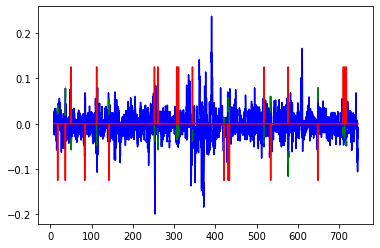

In [19]:
plt.plot(newdata['Time'], newdata['Y by KF'], color='blue')
plt.plot(lanchangedata['Time'], lanchangedata['Y by KF'], color='green')
plt.plot(newdata['Time'], newdata['lanchange']/8, color='red')

<AxesSubplot:>

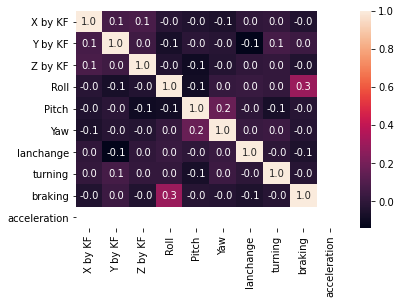

In [20]:
sns.heatmap(corr, annot = True, fmt = '.1f')

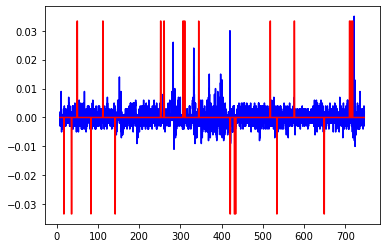

In [21]:
plt.plot(calculus_data['Time'], calculus_data['Roll'], color='blue')
plt.plot(newdata['Time'], newdata['lanchange']/30, color='red')

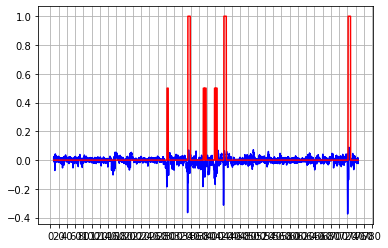

In [22]:
plt.plot(newdata['Time'], newdata['Z by KF'], color='blue')
plt.plot(newdata['Time'], newdata['braking']/2, color='red')
plt.xticks(range(0, 800, 20))
plt.grid(True)

In [ ]:
plt.scatter(data[['X']], data[['Roll']], alpha = 0.5, marker = '+')
plt.show

C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37002 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38971 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Us

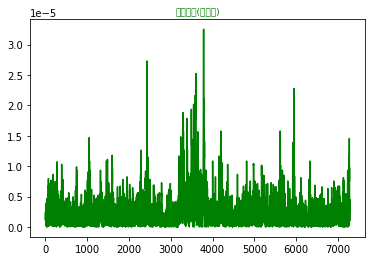

In [25]:
normalization_y=abs_y/N #歸一化處理（雙邊頻譜） 
plt.figure() 
plt.plot(x,normalization_y,'g') 
plt.title('雙邊頻譜(歸一化)',fontsize=9,color='green') 
plt.show()


C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21934 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37002 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38971 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Us

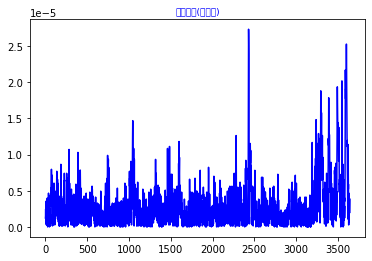

In [26]:
half_x = x[range(int(N/2))] #取一半區間 
normalization_half_y = normalization_y[range(int(N/2))] #由於對稱性，只取一半區間（單邊頻譜） 
plt.figure() 
plt.plot(half_x,normalization_half_y,'b') 
plt.title('單邊頻譜(歸一化)',fontsize=9,color='blue')
plt.show()